# Mini-Project 3: Classification of Image Data


*   McGill University
*   845 Sherbrooke Street West, Montréal (Québec) H3A 0G4




## 1. Acquiring, preprocessing, and analyzing the data

### 1.1. Loading and looking at data


In this kernel, we will be building a CNN from scratch for CIFAR 10 dataset loaded from keras. It is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images. We will try to find the best CNN model for this dataset.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data() #load cifar 10 dataset from keras

In [68]:
# let's see the dimension of our training data.
print(x_train.shape)
print(y_train.shape)
#Looks like x_train has 50000 entries of dimension 32*32*3 and y_train has 50000 entries of dimension 1

(50000, 32, 32, 3)
(50000, 1)


In [69]:
# let's see the dimension of our testing data.
print(x_test.shape)
print(y_test.shape)
# As we expected, it is similar to the shape of trainig data

(10000, 32, 32, 3)
(10000, 1)


In [70]:
# how about we try to see the contents. Let's look at the first element of x_train
x_train[0]
# It is simply an array of numbers - Note that these numbers denote the pixel values(0-255)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [71]:
y_train
# We know that all the images are labelled over 10 categories. 
#So, the y_train is a number between 0 to 10 where each number depicts one category.

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
# Let's re-scale/do normalization, so that all the pixel values lie within 0 to 1.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [73]:
# Let's see how it looks after re-scale/normalization
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [74]:
# Let's see number of classes that we have
no_of_classes = len(np.unique(y_train))
no_of_classes

10

In [75]:
import keras
# here, we are transforming y_train and y_test to be an array of size 10.
# The value of y_train/y_test as we saw earlier was a number from 0 to 9 each depicting one category.
# The value of y is represented by 1 in the corresponding array position and others are set to 0. 
# So, each row has only one item whose value will be 1 which depicts the category.
y_train = keras.utils.to_categorical(y_train,no_of_classes)
y_test = keras.utils.to_categorical(y_test,no_of_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [76]:
# we are going to divide our training set into 2 sets - train and validation.
x_train,x_valid = x_train[10000:],x_train[:10000]
y_train,y_valid = y_train[10000:],y_train[:10000]
print(x_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 10)


In [77]:
print(x_valid.shape)
print(y_valid.shape)

(10000, 32, 32, 3)
(10000, 10)


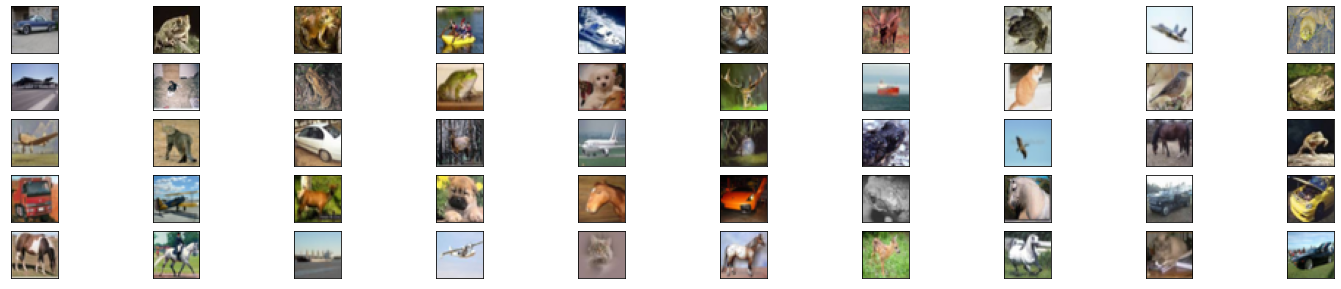

In [78]:
#let's visualize the first 50 images of training set
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,5))
for i in range(50):
    ax = fig.add_subplot(5,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

## 2. Implementing the Convolutional Neural Networks(CNN)

In [79]:
# Time to create our model ! Using convolutional and max pooling layers.
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
#To initialize the neural network we create an object of the Sequential class.
model = Sequential()

#To add the convolution layer, we call the add function with the classifier object and pass in Convolution2D with parameters. 
#Convolution2D is used to make the convolutional network that deals with the images.
#We use MaxPooling to reduce the size of the feature map. Generally we create a pool size of 2x2 for max pooling. 
#This enables us to reduce the size of the feature map while not losing important image information.
model.add(Conv2D(filters=16, kernel_size = 2, padding = 'same',activation = 'relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

#By using Flatten function, all the pooled feature maps are taken and put into a single vector. 
#The Flatten function flattens all the feature maps into a single column.
#Dense adds the fully connected layer to the neural network.

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)         

In [80]:
#Compile the model
#This function expects three parameters: the optimizer, the loss function, and the metrics of performance
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics=['accuracy'])
print('compiled!')

compiled!


In [81]:
# start training
from keras.callbacks import ModelCheckpoint
# We use modelcheckpoint in order to save our results and find out the best model. Later we will use that best for calculating the test accuracy

checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

history = model.fit(x_train,y_train,batch_size=32, epochs = 15,
          validation_data=(x_valid,y_valid),
          callbacks=[checkpoint],
          verbose=2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 45s - loss: 1.5860 - accuracy: 0.4229 - val_loss: 1.2742 - val_accuracy: 0.5482

Epoch 00001: val_loss improved from inf to 1.27424, saving model to best_model.h5
Epoch 2/15
 - 44s - loss: 1.2641 - accuracy: 0.5502 - val_loss: 1.1156 - val_accuracy: 0.5973

Epoch 00002: val_loss improved from 1.27424 to 1.11560, saving model to best_model.h5
Epoch 3/15
 - 44s - loss: 1.1352 - accuracy: 0.5967 - val_loss: 1.1001 - val_accuracy: 0.6054

Epoch 00003: val_loss improved from 1.11560 to 1.10006, saving model to best_model.h5
Epoch 4/15
 - 44s - loss: 1.0546 - accuracy: 0.6283 - val_loss: 1.0011 - val_accuracy: 0.6538

Epoch 00004: val_loss improved from 1.10006 to 1.00111, saving model to best_model.h5
Epoch 5/15
 - 44s - loss: 0.9887 - accuracy: 0.6468 - val_loss: 0.9085 - val_accuracy: 0.6775

Epoch 00005: val_loss improved from 1.00111 to 0.90847, saving model to best_model.h5
Epoch 6/15
 - 44s - loss: 0.9354 - accuracy: 0.66

In [82]:
  #Let's check the accuracy score of the best model on our test set
model.load_weights('best_model.h5')
score = model.evaluate(x_test,y_test,verbose=0)
score[1]
# Not bad ! we have an accuracy score of 73% on our test set.

0.7319999933242798

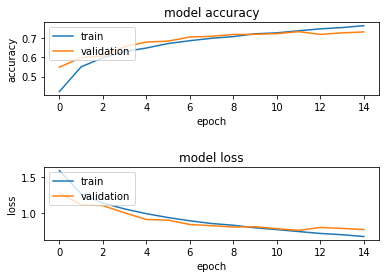

In [89]:
#Lets try to visualize the accuracy and loss over the epochs.
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
   
 # summarize history for loss  
 # For increasing the space between 2 plots
plt.subplots_adjust(hspace=1)

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()  